<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Data</p> 

<div style="background-color:#d5eae9; padding:20px; font-size:15px">
    <strong>Dataset</strong> 
    <br>
    
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset.

In [4]:
#import libraries
import os
import pathlib
import itertools
import numpy as np
import matplotlib.pyplot as plt

import splitfolders

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install git+https://github.com/tensorflow/docs

  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\novin\AppData\Local\Temp\pip-req-build-hiiu_dqq'


  Cloning https://github.com/tensorflow/docs to c:\users\novin\appdata\local\temp\pip-req-build-hiiu_dqq
  Resolved https://github.com/tensorflow/docs to commit d13c500b2e552ce04095287a99c575d2685a2160
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [3]:
import tensorflow_docs as tfdocs

In [ ]:
<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Import Dataset</p>

In [9]:
# dataset path
root_path = 'E:\Deep Learning\IMT\CNN\Rice_Image_Dataset'
root_path = pathlib.Path(root_path)

In [12]:
# split train, validation and test set
splitfolders.ratio(input=root_path, output='rice_imgs', seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 75000 files [33:58, 36.80 files/s]


In [7]:
# store training, validation and testing set
BATCH_SIZE = 16
# resize the images from the directories to prevent ResourceExhaustedError
IMAGE_SIZE = (150, 150)

Train = keras.utils.image_dataset_from_directory(
    directory='E:\Deep Learning\IMT\CNN\Rice_Image_Dataset\train',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Validation = keras.utils.image_dataset_from_directory(
    directory='E:\Deep Learning\IMT\CNN\Rice_Image_Dataset\val',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Test = keras.utils.image_dataset_from_directory(
    directory='E:\Deep Learning\IMT\CNN\Rice_Image_Dataset',
    labels='inferred',
    label_mode='int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed=42,
)

Found 52500 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.
Found 11250 files belonging to 5 classes.


In [8]:
# check classes
for i in [Train, Validation, Test]:
    class_names = i.class_names
    print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [9]:
# check shape of train, validation, test
for image_batch, labels_batch in Train:
    print(f"Train Shape: {image_batch.shape} (Bathes = {len(Train)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Validation:
    print(f"Validation Shape: {image_batch.shape} (Bathes = {len(Validation)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Test:
    print(f"Test Shape: {image_batch.shape} (Bathes = {len(Test)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (16, 150, 150, 3) (Bathes = 3282)
Train label: (16,)

Validation Shape: (16, 150, 150, 3) (Bathes = 704)
Validation label: (16,)

Test Shape: (16, 150, 150, 3) (Bathes = 704)
Test label: (16,)



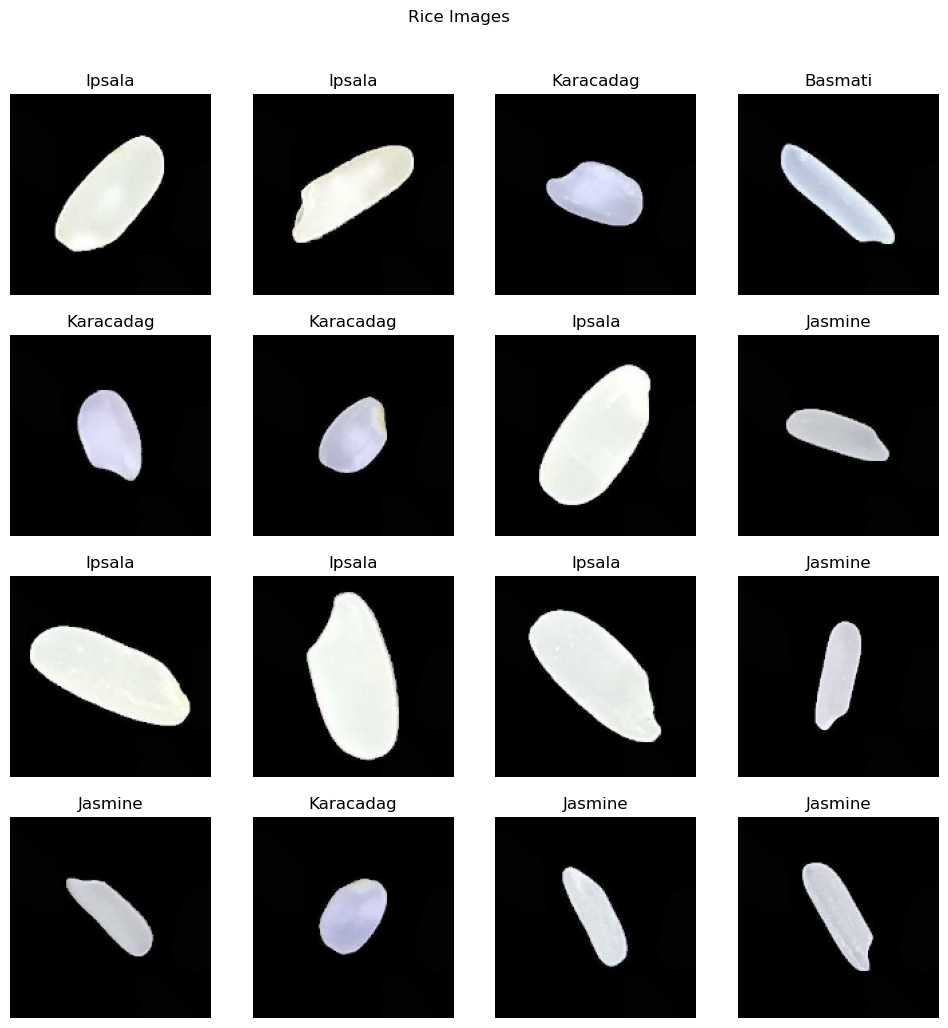

In [10]:
# visualing
plt.figure(figsize=(12, 12))
for images, labels in Train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images', y=0.95)
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Model 1</p>

In [20]:
# Define first CNN Model: 1 conv layer | 1 pool layer | 1 Dense layer | Dropout layer |ReLU activation
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5),
    ]
)

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 300)               52569900  
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                      

In [21]:
# compile and train the first model
model_hist = compile_and_fit(model_1, max_epochs=20)

Epoch 1/20
3282/3282 [==============================] - 60s 18ms/step - loss: 0.5487 - accuracy: 0.9210 - val_loss: 0.3621 - val_accuracy: 0.9653
Epoch 2/20
3282/3282 [==============================] - 60s 18ms/step - loss: 0.3755 - accuracy: 0.9503 - val_loss: 0.3053 - val_accuracy: 0.9679
Epoch 3/20
3282/3282 [==============================] - 56s 17ms/step - loss: 0.3399 - accuracy: 0.9555 - val_loss: 0.2990 - val_accuracy: 0.9691
Epoch 4/20
3282/3282 [==============================] - 61s 19ms/step - loss: 0.3235 - accuracy: 0.9594 - val_loss: 0.2896 - val_accuracy: 0.9733
Epoch 5/20
3282/3282 [==============================] - 58s 18ms/step - loss: 0.3101 - accuracy: 0.9604 - val_loss: 0.2468 - val_accuracy: 0.9790
Epoch 6/20
3282/3282 [==============================] - 59s 18ms/step - loss: 0.2954 - accuracy: 0.9612 - val_loss: 0.2581 - val_accuracy: 0.9755
Epoch 7/20
3282/3282 [==============================] - 61s 18ms/step - loss: 0.2934 - accuracy: 0.9629 - val_loss: 0.2350 -

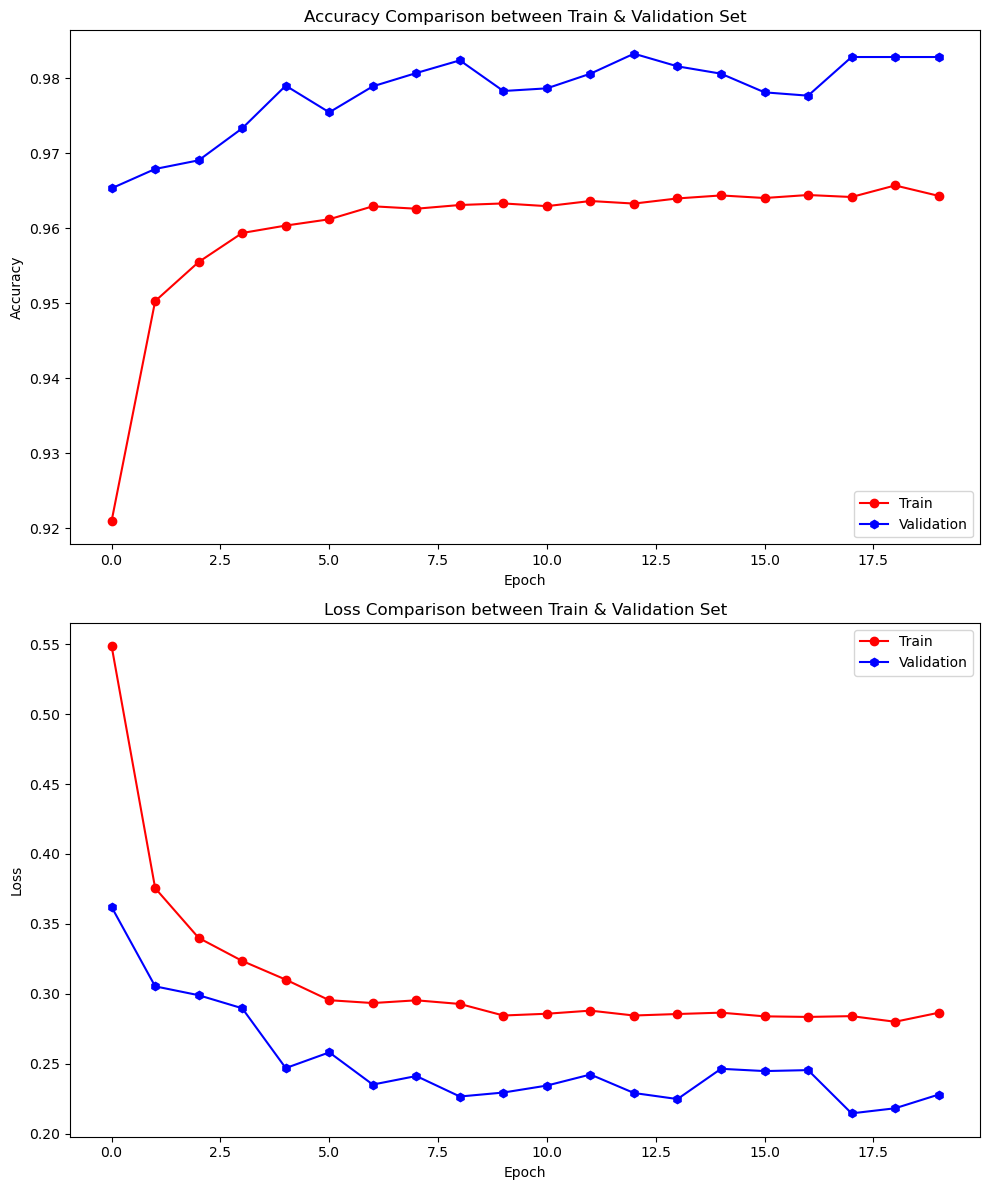

In [22]:
# plot results
plot_comparision_result(model_hist)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2250
         1.0       0.98      0.98      0.98      2250
         2.0       1.00      1.00      1.00      2250
         3.0       0.98      0.97      0.98      2250
         4.0       0.97      0.99      0.98      2250

    accuracy                           0.98     11250
   macro avg       0.98      0.98      0.98     11250
weighted avg       0.98      0.98      0.98     11250
 




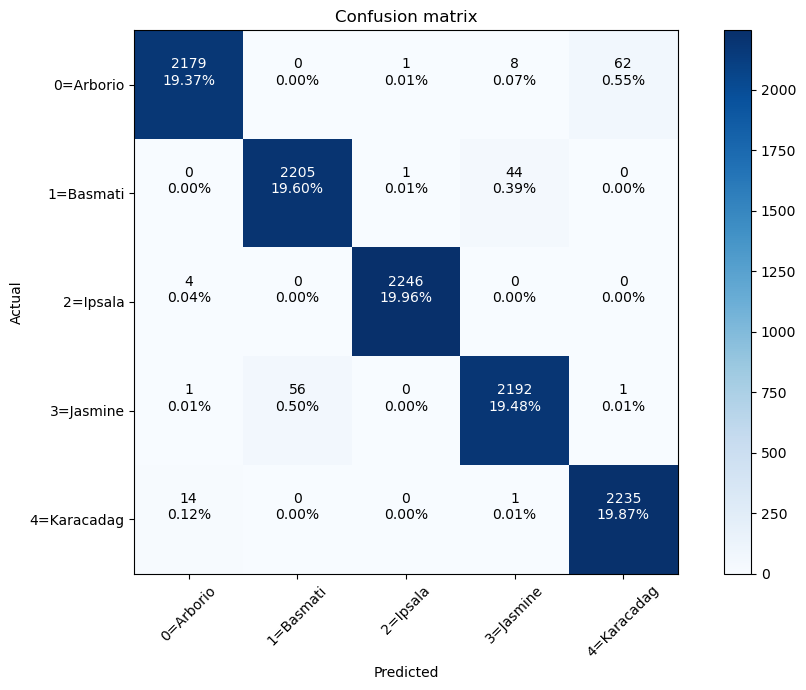

In [23]:
# plot confusion matrix 
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, model_3)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">Model 2</p>

In [24]:
# Define second CNN Model: by add the other Dense layer 
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=300, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(units=100, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=5),
    ]
)

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 300)               52569900  
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                      

In [25]:
# compile and train the second model
model_hist = compile_and_fit(model_4, max_epochs=20)

Epoch 1/20
3282/3282 [==============================] - 61s 18ms/step - loss: 0.4186 - accuracy: 0.9265 - val_loss: 0.2416 - val_accuracy: 0.9683
Epoch 2/20
3282/3282 [==============================] - 58s 18ms/step - loss: 0.2134 - accuracy: 0.9651 - val_loss: 0.1623 - val_accuracy: 0.9748
Epoch 3/20
3282/3282 [==============================] - 58s 18ms/step - loss: 0.1589 - accuracy: 0.9741 - val_loss: 0.1437 - val_accuracy: 0.9731
Epoch 4/20
3282/3282 [==============================] - 59s 18ms/step - loss: 0.1431 - accuracy: 0.9770 - val_loss: 0.1556 - val_accuracy: 0.9696
Epoch 5/20
3282/3282 [==============================] - 59s 18ms/step - loss: 0.1293 - accuracy: 0.9790 - val_loss: 0.1235 - val_accuracy: 0.9777
Epoch 6/20
3282/3282 [==============================] - 59s 18ms/step - loss: 0.1207 - accuracy: 0.9812 - val_loss: 0.1097 - val_accuracy: 0.9836
Epoch 7/20
3282/3282 [==============================] - 62s 19ms/step - loss: 0.1164 - accuracy: 0.9819 - val_loss: 0.1322 -

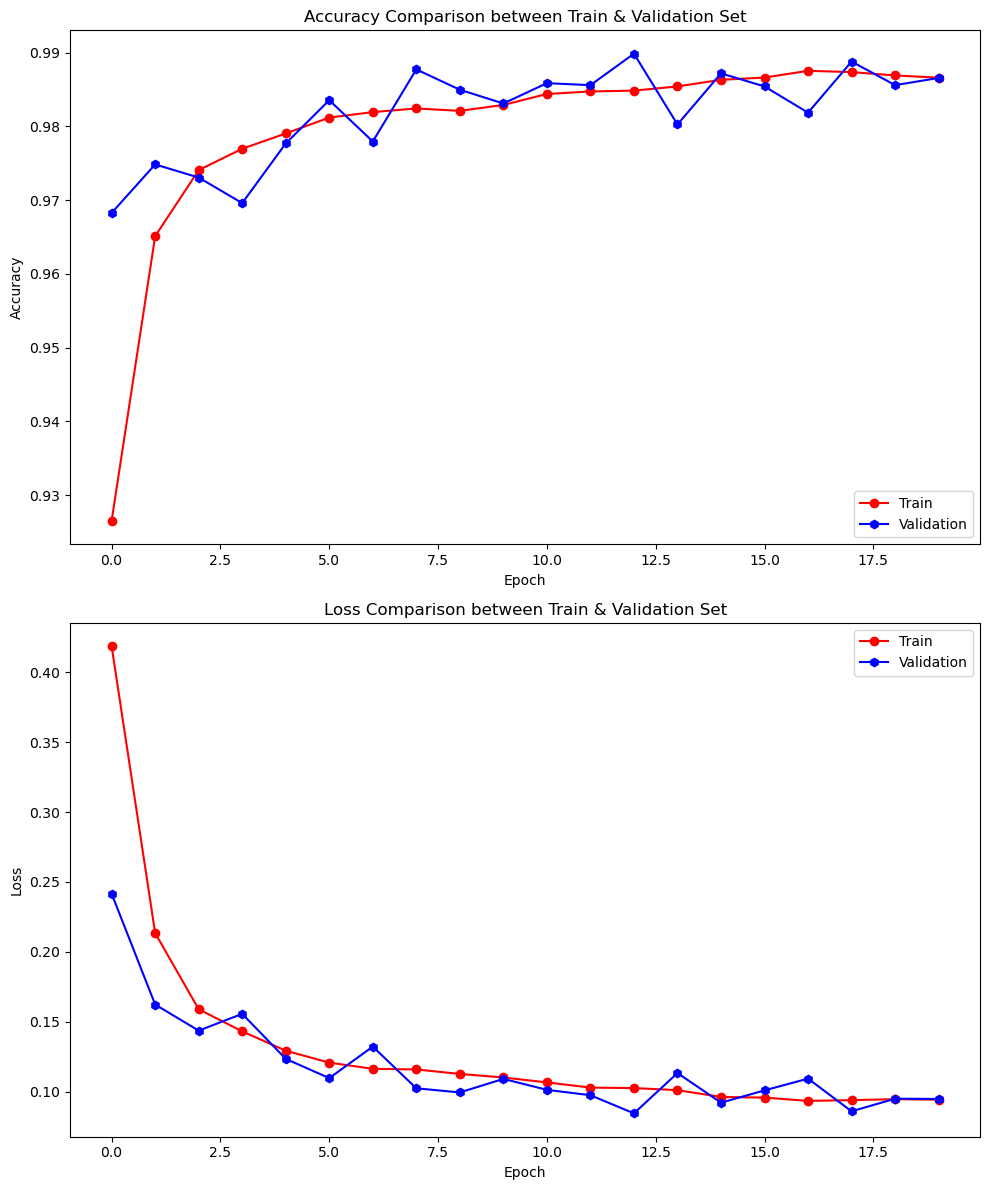

In [26]:
# plot results
plot_comparision_result(model_hist)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2250
         1.0       0.97      0.99      0.98      2250
         2.0       1.00      1.00      1.00      2250
         3.0       0.98      0.97      0.98      2250
         4.0       0.99      0.99      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250
 




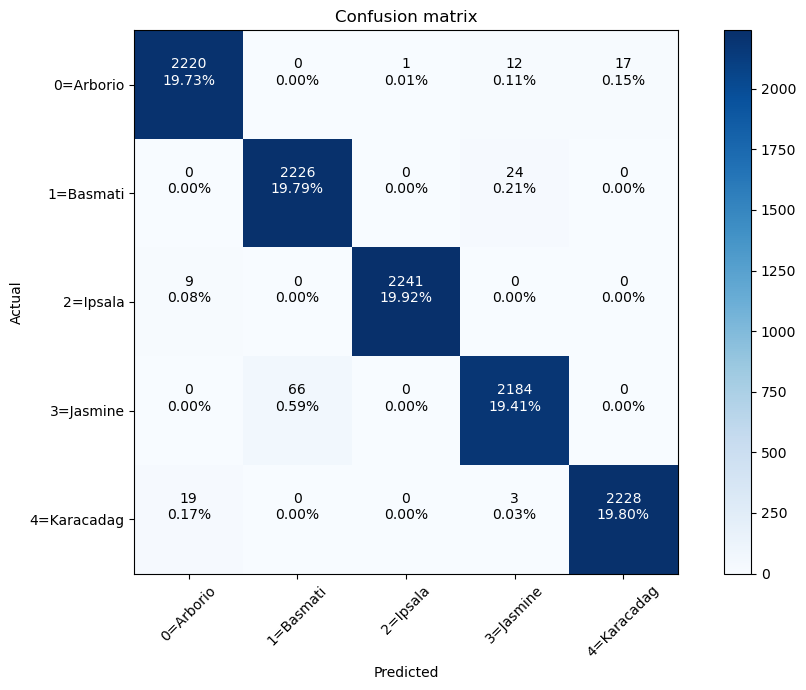

In [27]:
# plot confusion matrix 
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, model_4)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)